# Assignment 4: Breast Cancer Data Analysis

## 1. Project setup
I set up my project in VS Code by creating a folder called "assignment_4_ann" in my Documents. I initialized a Git repository to track changes and created a virtual environment to isolate my project dependencies. Finally, I activated the virtual environment to install the necessary packages without affecting my system.

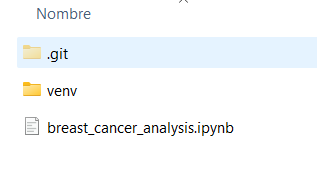

## 2. Dataset Acquisition and Preparation

In [21]:
# Import necessary libraries for data handling and machine learning
import pandas as pd

import warnings
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.exceptions import ConvergenceWarning

In [5]:
# Loading the Breast Cancer dataset from sklearn
dataset = load_breast_cancer()

In [6]:
# Converting the dataset into a DataFrame for easier handling
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['target'] = dataset.target

In [10]:
#Printing the first 5 rows of the dataset to get familiar with it
df.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [11]:
# Displaying some basic information and the first few rows of the dataset
print("Dataset Information:")
df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoot

In [14]:
# Checkinh for NaN values in each column and filter only those with NaNs
nan_counts = df.isna().sum()
columns_with_nan = nan_counts[nan_counts > 0]
print("Columns with NaN values:\n", columns_with_nan)

Columns with NaN values:
 Series([], dtype: int64)


**Observations:** 
- The dataset consists of 569 entries with 31 columns, all of which are numerical. 
- There are no missing values in any of the columns, ensuring completeness of the data.
- It contains various features that provide comprehensive information about the characteristics of breast cancer cells.
- The target column is an integer that indicates whether the tumor is malignant (1) or benign (0). 

To conclude dataset is comprehensive and well-structured, to continue developing the machine learning model to classify breast cancer tumors.

In [15]:
# Separate the features (X) from the target variable (y)
X = df.drop(columns=['target'])
y = df['target']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the feature values so they have a mean of 0 and a standard deviation of 1
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
#Saving the Standardized Data to a Pickle File:
import pickle
pickle.dump(scaler,open('scaler.pkl','wb' ))

## 3. Feature Selection


In [17]:
# Importing SelectKBest for feature selection
from sklearn.feature_selection import SelectKBest, f_classif

# Use SelectKBest to select the top 10 features
selector = SelectKBest(score_func=f_classif, k=10)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

print("\nFeature selection completed.")
print(f"Selected features indices: {selector.get_support(indices=True)}")


Feature selection completed.
Selected features indices: [ 0  2  3  6  7 20 22 23 26 27]


**Observation:** The feature selection process identified the top 10 features that are most relevant for predicting the target variable. By focusing on these features, I can build a more efficient and potentially more accurate model.

The following are the fetures selected:
-  0: mean radius
-  2: mean perimeter
-  3: mean area
-  6: mean concavity
-  7: mean concave points
-  20: worst radius
-  22: worst perimeter
-  23: worst area
-  26: worst concavity
-  27: worst concave points


## 4. Grid Search CV for Model Tuning


In [23]:
# Import necessary libraries for Grid Search CV and ANN
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

# Suppress ConvergenceWarning
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)

# Define the parameter grid to search for the best hyperparameters
param_grid = {
    'hidden_layer_sizes': [(50, 50, 50), (50, 100, 50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant', 'adaptive'],
}

# Create an MLPClassifier
mlp = MLPClassifier(max_iter=100)

# Set up Grid Search with Cross-Validation
grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, n_jobs=-1, cv=3)
grid_search.fit(X_train_selected, y_train)

# Print the best parameters found by Grid Search
print("\nBest parameters found:")
print(grid_search.best_params_)


Best parameters found:
{'activation': 'relu', 'alpha': 0.05, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'constant', 'solver': 'adam'}


## 5. Implementing an Artificial Neural Network (ANN) Model

In [24]:
# Get the best model from the grid search
best_mlp = grid_search.best_estimator_

# Train the model with the selected features
best_mlp.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred = best_mlp.predict(X_test_selected)

# Evaluate the model's performance
from sklearn.metrics import classification_report, accuracy_score

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print(f"Accuracy: {accuracy_score(y_test, y_pred)}")


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        43
           1       0.99      0.99      0.99        71

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

Accuracy: 0.9824561403508771


**Observations:**
- The model achieves high precision (0.98 for benign, 0.99 for malignant) and recall (0.98 for - benign, 0.99 for malignant).
- F1-scores are balanced at 0.98 for benign and 0.99 for malignant.
- Overall accuracy is 98.24%.
- Consistent performance with macro and weighted averages all at 0.98.
- The model is highly reliable for classifying both benign and malignant tumors.

#